<a href="https://colab.research.google.com/github/myvnfapp/camilkpi/blob/master/kpi_VNF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VNF KPI
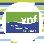

In [ ]:
#@title
from google.colab import files
uploaded = files.upload()



for fn in uploaded.keys():
  print('ok pour  "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))



import xlwt 
import numpy as np
import pandas as pd
import datetime
from text_to_speech import speak
speak("coucou coucou , allez courage, on fait ces indicateurs...", lang="fr")


incidents=pd.read_csv('incidents.csv', delimiter=";", encoding='ISO-8859-1').drop('Description',axis=1)
demandes=pd.read_csv('demandes.csv',delimiter=";", encoding='ISO-8859-1')
r=0




dur=[]
for t in incidents['Délai de résolution']:
    tt=(t.strip()).split(":")
    tt1=int(tt[0])*60
    tt2=int(tt[0])
    tt3=tt1+tt2
    dur.append(tt3)
   
incidents['temps']=dur


#print (incidents.groupby('Résolu par (groupe)').count())
# print (incidents.columns)
# print (incidents.dtypes)
# print (incidents["Date d'émission"])

def check_nan(value) -> bool:
    is_nan =  value != value
    return is_nan

def incidents_globaux():
    r=(incidents["N° d'Incident"] != '').sum()
    return r


def demandes_globaux():
    r1=demandes[(demandes["Libellé du service"] == "Créer une connaissance ") | (demandes["Libellé du service"] == "Demande d'achat")].count()[0]
    r=(demandes["Soumis par"] != '').sum()-r1
    return r


def connaissance_faitN1():
    # r=demandes[(demandes["Libellé du service"] == "Créer une connaissance ") & ((demandes["Soumis par"] == "CHAPPUIS Yohann") | (demandes["Soumis par"] == "MAURY David"))].count()['titre']
    r=demandes[(demandes["Libellé du service"] == "Créer une connaissance ") ].count()[0]
    return r


def demandes_faitN1():
    r=demandes[((demandes["Soumis par"] == "CHAPPUIS Yohann") | (demandes["Soumis par"] == "MAURY David"))].count()['titre']
    return r


def incidents_clotures():
    r=(incidents["Statut"] == 'Clôturé').sum()+(incidents["Statut"] == 'Résolu').sum()
    return r


def incidents_clotures_dt(dt):
    
    r=incidents[((incidents["Enregistré par"] == 'MAURY David') | (incidents["Enregistré par"] == 'CHAPPUIS Yohann') & (incidents["Entité du bénéficiaire (complète)"] == 'dt'))].count()[1]
    return r    

def incidents_N1_resolus():
    
    r=incidents[((incidents["Enregistré par"] == 'MAURY David') | (incidents["Enregistré par"] == 'CHAPPUIS Yohann')) & (incidents["Résolu par (groupe)"] == 'N1_ServiceDesk') ].count()[1]
    return r

def incidents_N1_autonomie():

    r=incidents[((incidents["Enregistré par"] == 'MAURY David') | (incidents["Enregistré par"] == 'CHAPPUIS Yohann')) & (incidents["Résolu par (groupe)"] == 'N1_ServiceDesk') & (incidents["Sujet (complet)"] == 'Incidents/Bureautique/Application/Habilitation-Accés') ].count()[1]
    #Sujet (complet)
    return r



def incidents_ouvertN1_et_resolus():
    
    r=incidents[((incidents["Enregistré par"] == 'MAURY David') | (incidents["Enregistré par"] == 'CHAPPUIS Yohann')) & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') ) ].count()[1]
    return r


def incidents_N1_ouverts():
    
    r=incidents[((incidents["Enregistré par"] == 'MAURY David') | (incidents["Enregistré par"] == 'CHAPPUIS Yohann'))] .count()[1]
    return r

def incidents_pri_p1():
    r=incidents[(incidents["Priorité"] == 1) & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') )  ].count()[1]
    r1=incidents.query("Priorité == 1 and (Statut == 'Clôturé'  or Statut == 'Résolu')" )['temps'].mean()
    r2=incidents[((incidents["Priorité"] == 1) & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') ) &   (incidents["temps"] <= 120)) ].count()[1]
    #r2=incidents.query("(Priorité == 1) and (Statut == 'Clôturé'  or Statut == 'Résolu') and (temps > 120 )  " )['temps'].count()[1]
    #print ("plus petit qus 120 ",r2)
    if check_nan(r1):
            r1=0
    if check_nan(r2):
        r2=0
    if check_nan(r):
        r=0
    return [r,r1,r2]


def incidents_pri_p2():
    r=incidents[(incidents["Priorité"] == 2) & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') )  ].count()[1]
    r1=incidents.query("Priorité == 2 and (Statut == 'Clôturé'  or Statut == 'Résolu')" )['temps'].mean()
    r2=incidents[((incidents["Priorité"] == 2) & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') ) &   (incidents["temps"] <= 240)) ].count()[1]
    
    if check_nan(r1):
        r1=0
    if check_nan(r2):
        r2=0
    if check_nan(r):
        r=0
    
    return [r,r1,r2]

def incidents_pri_p3():
    r=incidents[(incidents["Priorité"] == 3) & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') )  ].count()[1]
    r1=incidents.query("Priorité == 3 and (Statut == 'Clôturé'  or Statut == 'Résolu')" )['temps'].mean()
    r2=incidents[((incidents["Priorité"] == 3) & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') ) &   (incidents["temps"] <= 1440)) ].count()[1]
    if check_nan(r1):
        r1=0
    if check_nan(r2):
        r2=0
    if check_nan(r):
        r=0


    return [r,r1,r2]

def incidents_pri_p4():
    r=incidents[(incidents["Priorité"] == 4) & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') )  ].count()[1]
    r1=incidents.query("Priorité == 4 and (Statut == 'Clôturé'  or Statut == 'Résolu')" )['temps'].mean()
    r2=incidents[((incidents["Priorité"] == 4) & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') ) &   (incidents["temps"] <= 7200)) ].count()[1]
    if check_nan(r1):
        r1=0
    if check_nan(r2):
        r2=0
    if check_nan(r):
        r=0


    return [r,r1,r2]    


def incidents_clotureN1():
    r=incidents[((incidents["Statut"] == 'Clôturé') & (incidents["Résolu par (groupe)"] == 'N1_ServiceDesk'))] .count()[1]
    return r   

def incidents_N1_resolus_cloture():
    r=incidents[((incidents["Enregistré par"] == 'MAURY David') | (incidents["Enregistré par"] == 'CHAPPUIS Yohann')) & (incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu')].count()[1]
    return r

def delai():
    r=incidents[((incidents["Statut"] == 'Clôturé') & (incidents["Résolu par (groupe)"] == 'N1_ServiceDesk'))] .count()[1]
    return r 



# DT

def incidents_DT_tot(ent):
    r=incidents[(incidents["Entité du bénéficiaire (complète)"] == ent ) ] .count()[0]
    return r



    
def graph_categorie():
   # r= incidents['Sujet']
   #r=incidents.groupby('Sujet')["N° d'Incident"].nunique()
   r=incidents.groupby(by='Sujet', as_index=False).agg({"N° d'Incident": pd.Series.nunique})
   
   return r


#Incident globaux
incidents_globaux=incidents_globaux()
incidents_clotures=incidents_clotures()
incidents_globaux_pour=round((incidents_clotures/incidents_globaux)*100,2)
incidents_N1_resolus=incidents_N1_resolus()
incidents_N1_ouverts=incidents_N1_ouverts()
incidents_N1_pour=round((incidents_N1_resolus/incidents_globaux)*100,2)
incidents_pri_p1=incidents_pri_p1()
incidents_pri_p2=incidents_pri_p2()
incidents_pri_p3=incidents_pri_p3()
incidents_pri_p4=incidents_pri_p4()
incidents_clotureN1=incidents_clotureN1()
incidents_N1_resolus_cloture=incidents_N1_resolus_cloture()
incidents_clotureN1_pour=round((incidents_N1_resolus_cloture/incidents_N1_ouverts)*100,2)
incidents_ouvertN1_et_resolus=incidents_ouvertN1_et_resolus()
incidents_sla=int((incidents_pri_p1[1]+incidents_pri_p2[1]+incidents_pri_p3[1]+incidents_pri_p4[1])/incidents_pri_p1[0]+incidents_pri_p2[0]+incidents_pri_p3[0]+incidents_pri_p4[0])

incidents_DTCB_tot=incidents_DT_tot("DT CENTRE BOURGOGNE")
incidents_DTNPC_tot=incidents_DT_tot("DT NORD - PAS-DE-CALAIS")
incidents_DTRS_tot=incidents_DT_tot("DT RHONE-SAONE")
incidents_DTBS_tot=incidents_DT_tot("DT SEINE")
incidents_DTS_tot=incidents_DT_tot("DT STRASBOURG")
incidents_DTNE_tot=incidents_DT_tot("DT Nord-Est")
incidents_DTSO_tot=incidents_DT_tot("DT SUD-OUEST")


incidents_clotures_dtso=incidents_clotures_dt("DT SUD-OUEST")





D1_demandes_globaux=demandes_globaux()
demandes_faitN1=demandes_faitN1()
connaissance_faitN1=connaissance_faitN1()

workbook = xlwt.Workbook()
sheet = workbook.add_sheet('kpi Glo')
sheet1 = workbook.add_sheet('kpi DT')
sheet_dtnpc = workbook.add_sheet('kpi DTNPC')
sheet_dtbs = workbook.add_sheet('kpi DTBS')
sheet_dtne = workbook.add_sheet('kpi DTNE')
sheet_dts = workbook.add_sheet('kpi DTS')
sheet_dtbc = workbook.add_sheet('kpi DTNBC')
sheet_dtso = workbook.add_sheet('kpi DTSO')
sheet_dtrs = workbook.add_sheet('kpi DTRS')

font = xlwt.Font()
style = xlwt.XFStyle()



print (" Résultats ")
print ("  ")

l=2
c=1
sheet.col(1).width=19000
sheet.write(l, c,"Indicateurs")
sheet.write(l, c+1,"Valeurs")
l=l+1
sheet.write(l, c,"I1.incidents globaux (tous les incidents) ",style)
sheet.write(l, c+1,str(incidents_globaux))
l=l+1
sheet.write(l, c,"I2.incidents globaux statut =  Cloturés et résolus  ")
sheet.write(l, c+1,str(incidents_clotures))
l=l+1
sheet.write(l, c,"I3.incidents globaux statut= cloturés ou résolus en  %   ")
sheet.write(l, c+1,str(incidents_globaux_pour))
l=l+1
sheet.write(l, c,"I4.incident HD N1 (ouverts par David/Yohan) tous les Statut")
sheet.write(l, c+1,str(incidents_N1_ouverts))
l=l+1
sheet.write(l, c,"I5.incident HD  N1 (ouverts par David/Yohan)  résolus par le groupe HD N1 + Clot/res")
sheet.write(l, c+1,str(incidents_N1_resolus))
l=l+1
sheet.write(l, c,"I6.incident Helpdesk  N1 (ouverts par David/Yohan)  Statut =clot res")
sheet.write(l, c+1,str(incidents_ouvertN1_et_resolus))

l=l+1
sheet.write(l, c,"I7.nb de P1")
sheet.write(l, c+1,str(incidents_pri_p1[0]))
l=l+1
sheet.write(l, c,"I8.Temps moy tot. P1")
sheet.write(l, c+1,str(int(incidents_pri_p1[1]//60))+" H "+str(int(incidents_pri_p1[1]%60)))
l=l+1
sheet.write(l, c,"I9.nb P1 < 2 H")
sheet.write(l, c+1,str( int(incidents_pri_p1[2]) ))
l=l+1
sheet.write(l, c,"I10.nb P1 < 2 H en %")
if incidents_pri_p1[0] !=0:
    sheet.write(l, c+1,str( round( (incidents_pri_p1[2]/incidents_pri_p1[0]) * 100,2)))
l=l+1
sheet.write(l, c,"I11.nb de P2")
sheet.write(l, c+1,str(incidents_pri_p2[0]))
l=l+1
sheet.write(l, c,"I12.Temps moy tot. P2")
if incidents_pri_p2[1] !=0:
    sheet.write(l, c+1,str(int(incidents_pri_p2[1]//60))+" H "+str(int(incidents_pri_p2[1]%60)))
l=l+1
sheet.write(l, c,"I13.nb P2 < 4 H")
sheet.write(l, c+1,str( int(incidents_pri_p2[2]) ))
l=l+1
sheet.write(l, c,"I14.nb P2 < 4 H en %")
if incidents_pri_p2[0] !=0:
    sheet.write(l, c+1,str( round( (incidents_pri_p2[2]/incidents_pri_p2[0]) * 100,2)))


l=l+1
sheet.write(l, c,"I15.nb de P3")
sheet.write(l, c+1,str(incidents_pri_p3[0]))
l=l+1
sheet.write(l, c,"I16.Temps moy tot. P3")
sheet.write(l, c+1,str(int(incidents_pri_p3[1]//60))+" H "+str(int(incidents_pri_p3[1]%60)))
l=l+1
sheet.write(l, c,"I17.nb P3 < 12 H")
sheet.write(l, c+1,str( int(incidents_pri_p3[2]) ))
l=l+1
sheet.write(l, c,"I18.nb P3 < 12 H en %")
if incidents_pri_p3[0] !=0:
    sheet.write(l, c+1,str( round( (incidents_pri_p3[2]/incidents_pri_p3[0]) * 100,2)))


l=l+1
sheet.write(l, c,"I19.nb de P4")
sheet.write(l, c+1,str(incidents_pri_p4[0]))
l=l+1
sheet.write(l, c,"I20.Temps moy tot. P4")
sheet.write(l, c+1,str(int(incidents_pri_p4[1]//60))+" H "+str(int(incidents_pri_p4[1]%60)))
l=l+1
sheet.write(l, c,"I21.nb P4 < 5 jours")
sheet.write(l, c+1,str( int(incidents_pri_p4[2]) ))
l=l+1
sheet.write(l, c,"I22.nb P4 < 5 jours en %")
if incidents_pri_p4[0] !=0:
    sheet.write(l, c+1,str( round( (incidents_pri_p4[2]/incidents_pri_p4[0]) * 100,2)))

l=l+1
sheet.write(l, c,"I23.SLA global")
sheet.write(l, c+1,str(int(incidents_sla//60))+" H "+str(int(incidents_sla%60))+" min")


l=l+1
sheet.write(l, c,"I24.tous les incidents cloturés par le groupe  N1 ")
sheet.write(l, c+1,str(incidents_clotureN1))
l=l+1
sheet.write(l, c,"I25.tous les incidents cloturés par le groupe  N1 en  %   ")
sheet.write(l, c+1,str(incidents_clotureN1_pour))


l=l+2
sheet.write(l, c,"D1.Demandes globales(tous les demandes) ")
sheet.write(l, c+1,str(D1_demandes_globaux))

l=l+1
sheet.write(l, c,"D2.Demandes enregistrées par le N1")
sheet.write(l, c+1,str(demandes_faitN1))


l=l+1
sheet.write(l, c,"D3.connaissances crées")
sheet.write(l, c+1,str(connaissance_faitN1))




#KPI feuille kpi DT
l1=2
c1=1
sheet1.col(1).width=19000
sheet1.write(l1, c1,"Indicateurs")
sheet1.write(l1, c1+1,"Valeurs")

l1=l1+1
sheet1.write(l1, c1,"DTI1.incidents globaux DTCB")
sheet1.write(l1, c1+1,str(incidents_DTCB_tot))
l1=l1+1
sheet1.write(l1, c1,"DTI2.incidents globaux DTNPC")
sheet1.write(l1, c1+1,str(incidents_DTNPC_tot))
l1=l1+1
sheet1.write(l1, c1,"DTI3.incidents globaux DTRS")
sheet1.write(l1, c1+1,str(incidents_DTRS_tot))
l1=l1+1
sheet1.write(l1, c1,"DTI4.incidents globaux DTBS")
sheet1.write(l1, c1+1,str(incidents_DTBS_tot))
l1=l1+1
sheet1.write(l1, c1,"DTI5.incidents globaux DTS")
sheet1.write(l1, c1+1,str(incidents_DTS_tot))
l1=l1+1
sheet1.write(l1, c1,"DTI6.incidents globaux DTNE")
sheet1.write(l1, c1+1,str(incidents_DTNE_tot))
l1=l1+1
sheet1.write(l1, c1,"DTI6.incidents globaux DTSO")
sheet1.write(l1, c1+1,str(incidents_DTSO_tot))


#KPI feuille kpi DTSO
l2=2
c2=1
sheet_dtso.col(1).width=19000
sheet_dtso.write(l2, c2,"Indicateurs")
sheet_dtso.write(l2, c2+1,"Valeurs")
l2=l2+1
sheet_dtso.write(l2, c2,"DTI6.incidents globaux DTSO")
sheet_dtso.write(l2, c2+1,str(incidents_DTSO_tot))



















workbook.save('indicateurs.xls') 


